In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [13]:
# read csv files
df_Feb=pd.read_csv('202302-captialbikeshare-tripdata.csv') # Note: a different file name
df_Mar=pd.read_csv('202303-capitalbikeshare-tripdata.csv')
df_Apr=pd.read_csv('202304-capitalbikeshare-tripdata.csv')
df_May=pd.read_csv('202305-capitalbikeshare-tripdata.csv')
df_Jun=pd.read_csv('202306-capitalbikeshare-tripdata.csv')

In [14]:
# concat data
df=pd.concat([df_Feb,df_Mar,df_Apr,df_May,df_Jun])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1749886 entries, 0 to 430669
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    float64
 6   end_station_name    object 
 7   end_station_id      float64
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(6), object(7)
memory usage: 186.9+ MB


In [15]:
df.head()

ride_id rideable_type           started_at             ended_at  \
0  6D7F3F3DDD864A41  classic_bike  2023-02-04 21:08:26  2023-02-04 21:16:39   
1  1B4FD92511BA8869  classic_bike  2023-02-28 18:24:01  2023-02-28 18:28:46   
2  E215D5A904EC376F  classic_bike  2023-02-12 14:03:48  2023-02-12 14:05:44   
3  AF176FEC3204AEB5  classic_bike  2023-02-08 19:25:13  2023-02-08 19:33:08   
4  CB8BE52EB8F58E80  classic_bike  2023-02-27 14:48:59  2023-02-27 14:54:10   

                   start_station_name  start_station_id  \
0  New Jersey Ave & N St NW/Dunbar HS           31636.0   
1                 11th & Girard St NW           31126.0   
2                       3rd & H St NW           31604.0   
3             7th St & Florida Ave NW           31109.0   
4                       8th & V St NW           31134.0   

                            end_station_name  end_station_id  start_lat  \
0                              8th & V St NW         31134.0  38.907333   
1                              8th & V St NW         31134.0  38.925636   
2                              1st & H St NW         31638.0  38.899408   
3  7th & F St NW / National Portrait Gallery         31232.0  38.916137   
4                              8th & V St NW         31134.0  38.917716   

   start_lng    end_lat    end_lng member_casual  
0 -77.015360  38.917716 -77.022684        member  
1 -77.027112  38.917716 -77.022684        member  
2 -77.015289  38.900358 -77.012108        member  
3 -77.022003  38.897283 -77.022191        member  
4 -77.022684  38.917716 -77.022684        member

In [16]:
# Transform time to date ONLY
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

In [17]:
df.head()

ride_id rideable_type           started_at             ended_at  \
0  6D7F3F3DDD864A41  classic_bike  2023-02-04 21:08:26  2023-02-04 21:16:39   
1  1B4FD92511BA8869  classic_bike  2023-02-28 18:24:01  2023-02-28 18:28:46   
2  E215D5A904EC376F  classic_bike  2023-02-12 14:03:48  2023-02-12 14:05:44   
3  AF176FEC3204AEB5  classic_bike  2023-02-08 19:25:13  2023-02-08 19:33:08   
4  CB8BE52EB8F58E80  classic_bike  2023-02-27 14:48:59  2023-02-27 14:54:10   

                   start_station_name  start_station_id  \
0  New Jersey Ave & N St NW/Dunbar HS           31636.0   
1                 11th & Girard St NW           31126.0   
2                       3rd & H St NW           31604.0   
3             7th St & Florida Ave NW           31109.0   
4                       8th & V St NW           31134.0   

                            end_station_name  end_station_id  start_lat  \
0                              8th & V St NW         31134.0  38.907333   
1                              8th & V St NW         31134.0  38.925636   
2                              1st & H St NW         31638.0  38.899408   
3  7th & F St NW / National Portrait Gallery         31232.0  38.916137   
4                              8th & V St NW         31134.0  38.917716   

   start_lng    end_lat    end_lng member_casual started_at_date ended_at_date  
0 -77.015360  38.917716 -77.022684        member      2023-02-04    2023-02-04  
1 -77.027112  38.917716 -77.022684        member      2023-02-28    2023-02-28  
2 -77.015289  38.900358 -77.012108        member      2023-02-12    2023-02-12  
3 -77.022003  38.897283 -77.022191        member      2023-02-08    2023-02-08  
4 -77.022684  38.917716 -77.022684        member      2023-02-27    2023-02-27

In [18]:
# Group and get pickup occurrence for 22nd & H St NW
df_sub1 = df[df['start_station_name']=="22nd & H St NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")
df_pu

started_at_date start_station_name  pu_ct
0        2023-02-01     22nd & H St NW     20
1        2023-02-02     22nd & H St NW     26
2        2023-02-03     22nd & H St NW     14
3        2023-02-04     22nd & H St NW     12
4        2023-02-05     22nd & H St NW     17
..              ...                ...    ...
145      2023-06-26     22nd & H St NW     21
146      2023-06-27     22nd & H St NW     20
147      2023-06-28     22nd & H St NW     26
148      2023-06-29     22nd & H St NW     32
149      2023-06-30     22nd & H St NW     29

[150 rows x 3 columns]

In [19]:
# Group and get drop off occurrence for 22nd & H St NW
df_sub2 = df[df['end_station_name']=="22nd & H St NW"]
df_grp2 = df_sub2.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")
df_do

ended_at_date end_station_name  do_ct
0      2023-02-01   22nd & H St NW     24
1      2023-02-02   22nd & H St NW     28
2      2023-02-03   22nd & H St NW     17
3      2023-02-04   22nd & H St NW     13
4      2023-02-05   22nd & H St NW     24
..            ...              ...    ...
145    2023-06-26   22nd & H St NW     18
146    2023-06-27   22nd & H St NW     21
147    2023-06-28   22nd & H St NW     26
148    2023-06-29   22nd & H St NW     43
149    2023-06-30   22nd & H St NW     21

[150 rows x 3 columns]

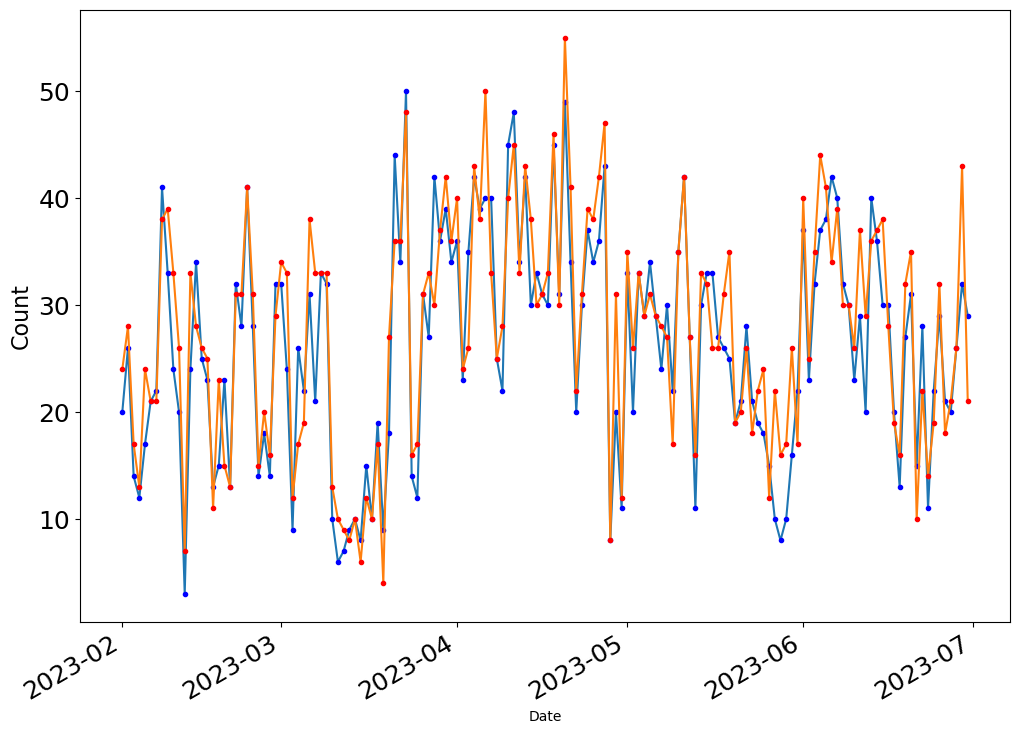

In [20]:
fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot_date( df_pu['started_at_date'], df_pu['pu_ct'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot_date( df_do['ended_at_date'], df_do['do_ct'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)
plt.show()  

In [25]:
df_weather = pd.read_csv('washington, dc 2023-01-01 to 2023-12-31.csv')

df_weather.head()

name    datetime  tempmax  tempmin  temp  feelslikemax  \
0  washington, dc  2023-01-01     61.4     43.5  51.8          61.4   
1  washington, dc  2023-01-02     63.0     40.0  50.9          63.0   
2  washington, dc  2023-01-03     68.0     50.1  59.3          68.0   
3  washington, dc  2023-01-04     65.0     53.3  59.5          65.0   
4  washington, dc  2023-01-05     64.0     49.6  56.4          64.0   

   feelslikemin  feelslike   dew  humidity  ...  solarenergy  uvindex  \
0          41.7       51.2  46.2      82.2  ...          8.7        4   
1          36.3       50.2  44.2      79.3  ...          5.7        4   
2          50.1       59.3  52.3      78.5  ...          3.4        2   
3          53.3       59.5  55.0      85.4  ...          2.8        2   
4          45.1       55.9  46.0      70.4  ...          6.0        4   

   severerisk              sunrise               sunset  moonphase  \
0          10  2023-01-01T07:26:52  2023-01-01T16:56:42       0.32   
1          10  2023-01-02T07:26:59  2023-01-02T16:57:31       0.35   
2          10  2023-01-03T07:27:04  2023-01-03T16:58:22       0.39   
3          10  2023-01-04T07:27:07  2023-01-04T16:59:14       0.42   
4          10  2023-01-05T07:27:08  2023-01-05T17:00:08       0.46   

               conditions                                   description  \
0  Rain, Partially cloudy  Clearing in the afternoon with morning rain.   
1        Partially cloudy             Partly cloudy throughout the day.   
2                Overcast              Cloudy skies throughout the day.   
3        Partially cloudy             Partly cloudy throughout the day.   
4        Partially cloudy             Partly cloudy throughout the day.   

                icon                                           stations  
0               rain  KDCA,72405013743,72403793728,KADW,KDAA,AS365,7...  
1  partly-cloudy-day  KDCA,72405013743,72403793728,KADW,KDAA,AS365,7...  
2             cloudy  KDCA,72405013743,72403793728,KADW,KDAA,AS365,7...  
3  partly-cloudy-day  KDCA,72405013743,72403793728,KADW,KDAA,AS365,7...  
4  partly-cloudy-day  KDCA,72405013743,72403793728,KADW,KDAA,AS365,7...  

[5 rows x 33 columns]

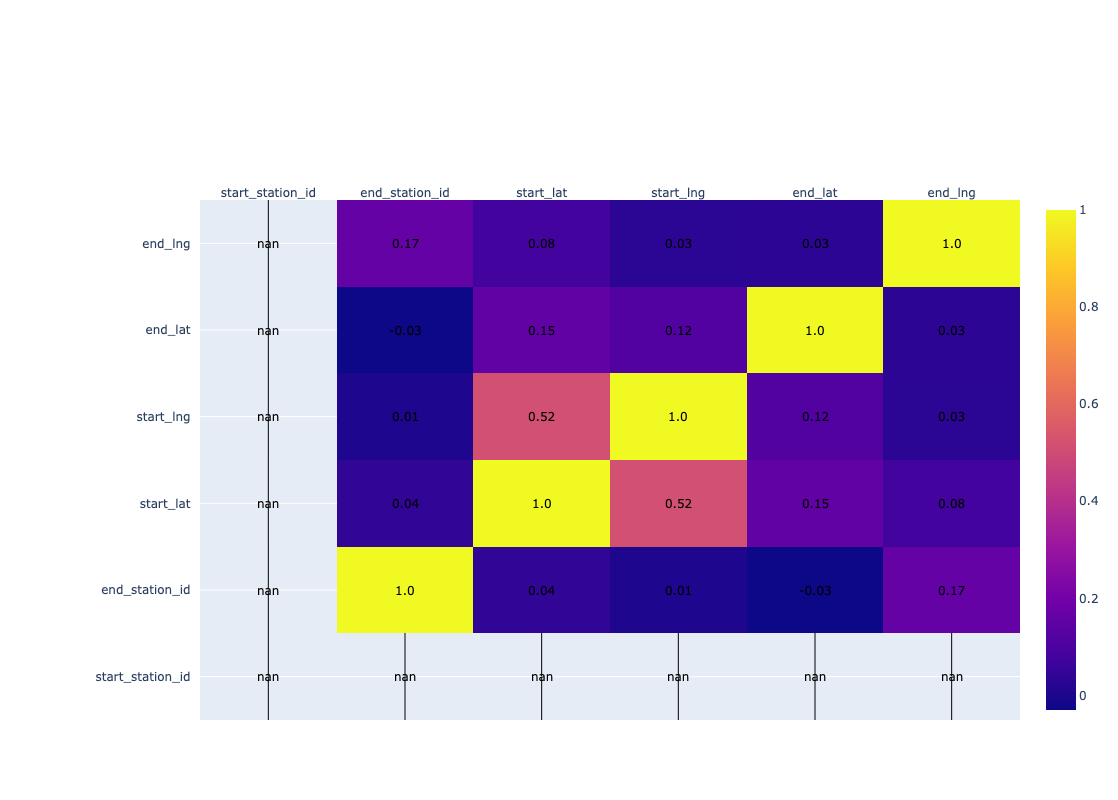

In [26]:
import plotly.figure_factory as ff
from plotly.offline import iplot
import numpy as np
numeric_df_sub1 = df_sub1.select_dtypes(include=[np.number])
corrs=numeric_df_sub1.corr()
# Plotting Heatmap to know about Correlation
figure=ff.create_annotated_heatmap(z=corrs.values,x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.layout.margin = dict(l=200, t=200)
figure.layout.height = 800
figure.layout.width = 1000
iplot(figure)

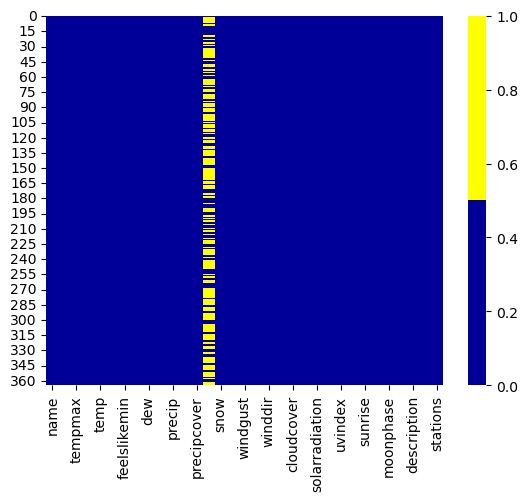

In [27]:
# Date time format 
df_weather['datetime'] = pd.to_datetime(df_weather['datetime']).dt.date

# Use sns heatmap to see whats are the null values.
coln = df_weather.columns[:df_weather.shape[1]]  
colors = ['#000099','#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(df_weather[coln].isnull(), cmap = sns.color_palette(colors))
plt.show()

In [28]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

In [29]:
# Merge with weather data and remove dates and station name
# pickup data
df_merge = df_pu.merge(df_do, left_on='started_at_date', right_on='ended_at_date') 


In [30]:
df_merge.head()

started_at_date start_station_name  pu_ct ended_at_date end_station_name  \
0      2023-02-01     22nd & H St NW     20    2023-02-01   22nd & H St NW   
1      2023-02-02     22nd & H St NW     26    2023-02-02   22nd & H St NW   
2      2023-02-03     22nd & H St NW     14    2023-02-03   22nd & H St NW   
3      2023-02-04     22nd & H St NW     12    2023-02-04   22nd & H St NW   
4      2023-02-05     22nd & H St NW     17    2023-02-05   22nd & H St NW   

   do_ct  
0     24  
1     28  
2     17  
3     13  
4     24

In [31]:
# Merge with weather data and remove dates and station name
# pickup data
df_merge = df_merge.merge(df_weather, left_on='started_at_date', right_on='datetime') 
df_merge = df_merge.drop(columns=['started_at_date','start_station_name','datetime'])

In [32]:
df_merge.head()

pu_ct ended_at_date end_station_name  do_ct  tempmax  tempmin  temp  \
0     20    2023-02-01   22nd & H St NW     24     40.7     32.5  35.6   
1     26    2023-02-02   22nd & H St NW     28     41.8     31.3  36.0   
2     14    2023-02-03   22nd & H St NW     17     40.7     19.8  31.7   
3     12    2023-02-04   22nd & H St NW     13     31.9     16.9  24.5   
4     17    2023-02-05   22nd & H St NW     24     58.8     33.0  44.2   

   feelslikemax  feelslikemin  feelslike  ...  windspeed  winddir  \
0          37.4          23.9       29.1  ...       15.3    347.8   
1          36.8          28.1       32.2  ...       11.3    199.9   
2          34.1           4.3       20.7  ...       28.1    317.1   
3          23.0           2.6       15.1  ...       16.9    221.9   
4          58.8          22.9       39.9  ...       17.9    195.8   

   sealevelpressure  cloudcover  visibility  solarradiation  solarenergy  \
0            1025.5        81.8         9.1           130.3         11.2   
1            1021.8        94.5         9.9            87.7          7.5   
2            1021.4        54.6         9.9           143.9         12.5   
3            1035.2        27.8         9.9           150.7         13.1   
4            1022.1        79.7         9.9           116.1          9.9   

   uvindex  moonphase               icon  
0        6       0.36               snow  
1        4       0.40             cloudy  
2        6       0.43  partly-cloudy-day  
3        6       0.46  partly-cloudy-day  
4        5       0.50  partly-cloudy-day  

[5 rows x 27 columns]

In [18]:
df_merge.columns

Index(['pu_ct', 'ended_at_date', 'end_station_name', 'do_ct', 'tempmax',
       'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'moonphase', 'icon'],
      dtype='object')

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Model Comparsion - Pickup

In [89]:
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your dataset
df = df_merge.drop(columns=['ended_at_date', 'end_station_name'])  # Rename the dataset to df for convenience
df = pd.get_dummies(data=df, drop_first=True)

y = df['pu_ct']

# Define your models here
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'LASSO': Lasso(),
    'Elastic Net': ElasticNet(),
    'KNN Regressor': KNeighborsRegressor()
}

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

# List of features
features = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'moonphase',
       'icon_cloudy', 'icon_partly-cloudy-day', 'icon_rain', 'icon_snow']

# Initialize a list to keep track of MSE and features used
model_performance = []

# Start with an empty list of features to use and add one feature at a time
for i in range(1, len(features) + 1):
    current_features = features[:i]
    X = df[current_features]
    
    # Splitting the dataset for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=200)
    
    # Record performance for each model with the current set of features
    for name, model in models.items():
        mse = train_and_evaluate(model, X_train, X_test, y_train, y_test)
        model_performance.append({
            'Model': name,
            'MSE': mse,
            'Features': ', '.join(current_features)  # Store the features used as a string
        })

# Convert the list of model performances to a DataFrame for analysis
performance_df_pu = pd.DataFrame(model_performance)

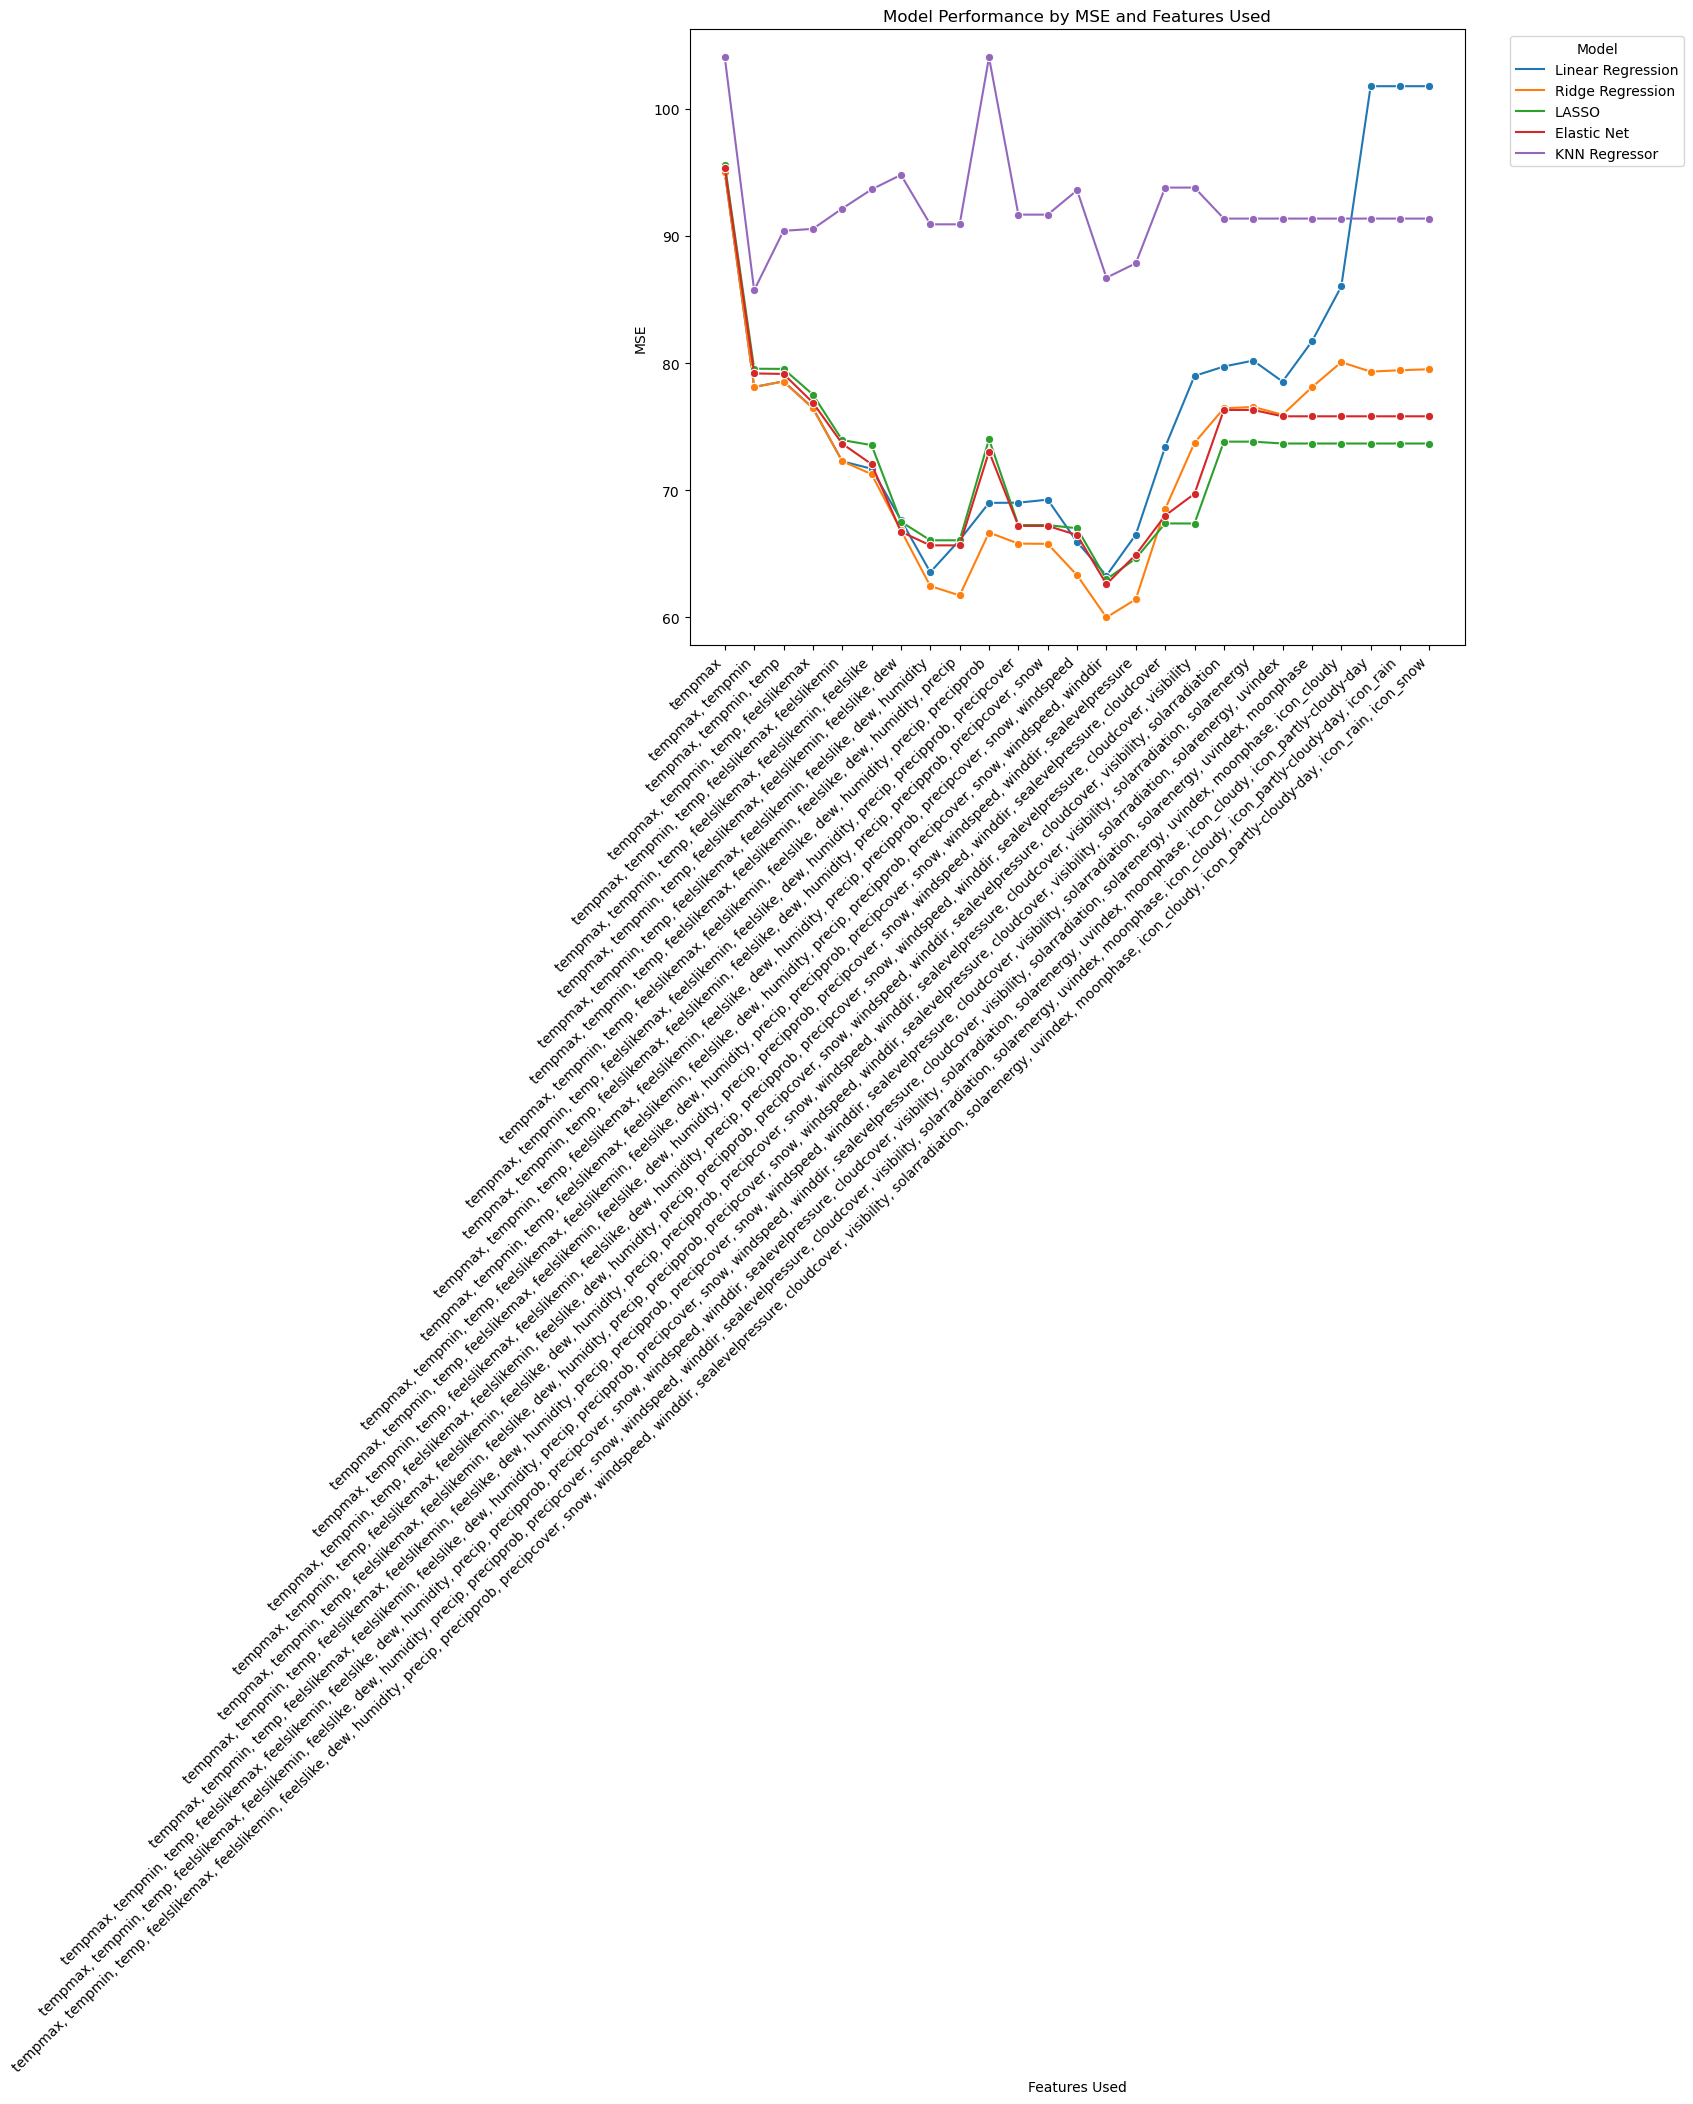

In [90]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting
plt.figure(figsize=(10, 8))

# Since the DataFrame is sorted, we can plot the MSEs in order.
# We'll use a lineplot here, but you can choose a bar plot if that's more appropriate for your data.
sns.lineplot(data=performance_df_pu, x='Features', y='MSE', hue='Model', marker='o')

# Improve readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Features Used')
plt.ylabel('MSE')
plt.title('Model Performance by MSE and Features Used')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot
plt.tight_layout()  # Adjust layout so everything fits without overlapping

# Show the plot
plt.show()

In [92]:
# the MSE for each model with the corresponding features used
# Sort the DataFrame by 'Model' first, then 'MSE', so that the lowest MSE is at the top for each model
performance_df_pu_sorted = performance_df_pu.sort_values(by=['Model', 'MSE'])

# Drop duplicates, keeping only the first entry for each model, which is the entry with the lowest MSE
lowest_mse_per_model_pu = performance_df_pu_sorted.drop_duplicates(subset='Model')

# Set display options to show the full content of 'Features' column
pd.set_option('display.max_colwidth', None)

# Display the DataFrame with the lowest MSE for each model
print(lowest_mse_per_model_pu)

                Model        MSE  \
68        Elastic Net  62.600098   
9       KNN Regressor  85.728444   
67              LASSO  62.976665   
65  Linear Regression  63.265892   
66   Ridge Regression  59.984724   

                                                                                                                                   Features  
68  tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, snow, windspeed, winddir  
9                                                                                                                          tempmax, tempmin  
67  tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, snow, windspeed, winddir  
65  tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, snow, windspeed, winddir  
66  tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, h

In [93]:
# the MSE for each model with the corresponding features used
# Sort the DataFrame by MSE in ascending order
performance_df_pu_sorted = performance_df_pu.sort_values('MSE')
performance_df_pu_sorted.head(1)

Model        MSE  \
66  Ridge Regression  59.984724   

                                                                                                                                   Features  
66  tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, snow, windspeed, winddir

## Model Comparsion - Dropoff

In [94]:
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

# Your dataset
df = df_merge.drop(columns=['ended_at_date', 'end_station_name'])  # Rename the dataset to df for convenience
df = pd.get_dummies(data=df, drop_first=True)

y = df['do_ct']

# Define your models here
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'LASSO': Lasso(),
    'Elastic Net': ElasticNet(),
    'KNN Regressor': KNeighborsRegressor()
}

# Function to train and evaluate a model
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    return mse

# List of features
features = ['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin',
       'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover',
       'snow', 'windspeed', 'winddir', 'sealevelpressure', 'cloudcover',
       'visibility', 'solarradiation', 'solarenergy', 'uvindex', 'moonphase',
       'icon_cloudy', 'icon_partly-cloudy-day', 'icon_rain', 'icon_snow']

# Initialize a list to keep track of MSE and features used
model_performance = []

# Start with an empty list of features to use and add one feature at a time
for i in range(1, len(features) + 1):
    current_features = features[:i]
    X = df[current_features]
    
    # Splitting the dataset for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=200)
    
    # Record performance for each model with the current set of features
    for name, model in models.items():
        mse = train_and_evaluate(model, X_train, X_test, y_train, y_test)
        model_performance.append({
            'Model': name,
            'MSE': mse,
            'Features': ', '.join(current_features)  # Store the features used as a string
        })

# Convert the list of model performances to a DataFrame for analysis
performance_df_do = pd.DataFrame(model_performance)

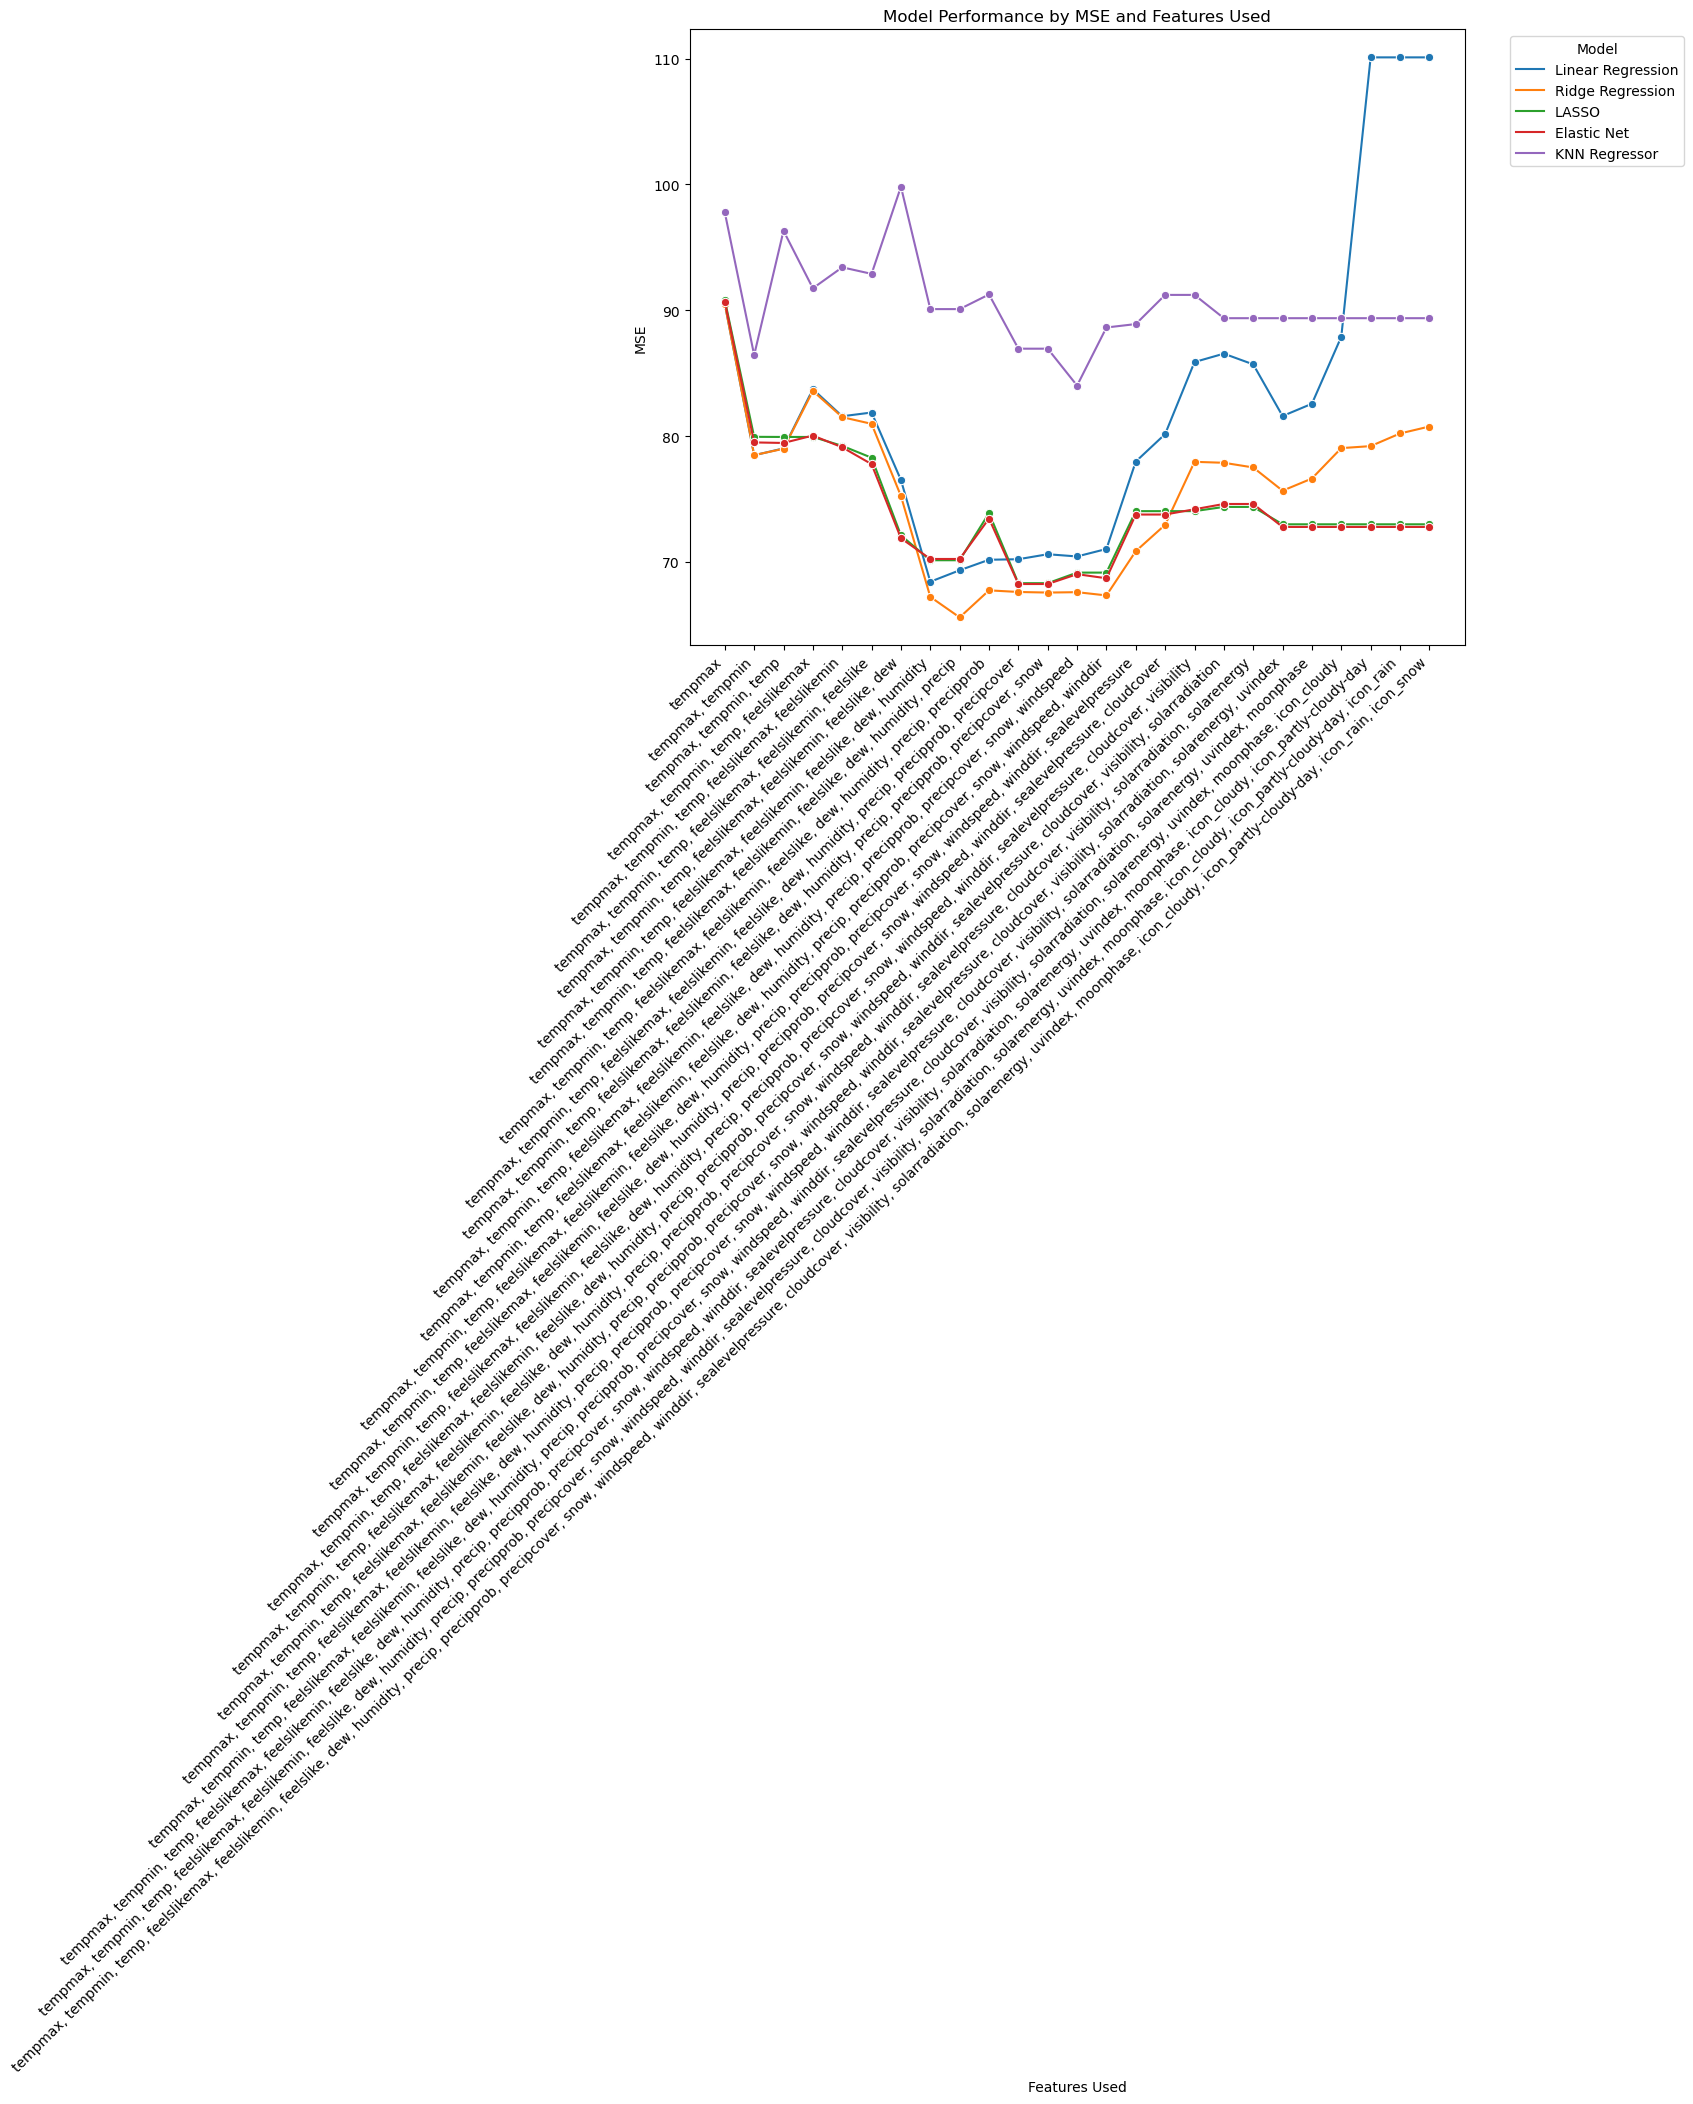

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns


# Plotting
plt.figure(figsize=(10, 8))

# Since the DataFrame is sorted, we can plot the MSEs in order.
# We'll use a lineplot here, but you can choose a bar plot if that's more appropriate for your data.
sns.lineplot(data=performance_df_do, x='Features', y='MSE', hue='Model', marker='o')

# Improve readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Features Used')
plt.ylabel('MSE')
plt.title('Model Performance by MSE and Features Used')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot
plt.tight_layout()  # Adjust layout so everything fits without overlapping

# Show the plot
plt.show()

In [96]:
# the MSE for each model with the corresponding features used
# Sort the DataFrame by 'Model' first, then 'MSE', so that the lowest MSE is at the top for each model
performance_df_do_sorted = performance_df_do.sort_values(by=['Model', 'MSE'])

# Drop duplicates, keeping only the first entry for each model, which is the entry with the lowest MSE
lowest_mse_per_model_do = performance_df_do_sorted.drop_duplicates(subset='Model')

# Set display options to show the full content of 'Features' column
pd.set_option('display.max_colwidth', None)

# Display the DataFrame with the lowest MSE for each model
print(lowest_mse_per_model_do)

                Model        MSE  \
53        Elastic Net  68.244185   
64      KNN Regressor  84.013778   
52              LASSO  68.310409   
35  Linear Regression  68.426862   
41   Ridge Regression  65.593919   

                                                                                                                          Features  
53                   tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover  
64  tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover, snow, windspeed  
52                   tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip, precipprob, precipcover  
35                                                    tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity  
41                                            tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humi

In [99]:
# the MSE for each model with the corresponding features used
# Sort the DataFrame by MSE in ascending order
performance_df_do_sorted = performance_df_do.sort_values('MSE')
performance_df_do_sorted.head(1)

Model        MSE  \
41  Ridge Regression  65.593919   

                                                                                Features  
41  tempmax, tempmin, temp, feelslikemax, feelslikemin, feelslike, dew, humidity, precip

In [260]:
# team agrees on using same set of x feature to evaluate different modelings

## Linear Regression - Pickup

In [86]:
# Splitting the dataset for training and testing
X = df_merge.drop(columns=['pu_ct'])
y = df_merge['pu_ct']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=200)

In [64]:
Model_linear = LinearRegression()
Model_linear.fit(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']], y_train) 

LinearRegression()

In [65]:
print(pd.Series(Model_linear.coef_.flatten(), index=X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']].columns))

tempmax          1.974751
tempmin          0.722858
temp            -7.231890
feelslikemax    -0.300938
feelslikemin    -0.341258
feelslike        3.622103
dew              1.281771
humidity        -0.562580
precip         -14.966812
precipprob      -0.055412
precipcover      0.012891
snow            18.659574
windspeed        0.098502
winddir          0.016617
dtype: float64


In [69]:
y_pred = Model_linear.predict(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']])
mse_train_6 = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse_train_6}")
r2 = r2_score(y_train, y_pred)
print(f"Co-efficient of determination {r2}")

MSE in training data is 51.954
Co-efficient of determination 0.48157304287152425


In [70]:
y_pred = Model_linear.predict(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']])
mse_test_6 = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE in test data is {mse_test_6}")
r2 = r2_score(y_test, y_pred)
print(f"Co-efficient of determination {r2}")

MSE in test data is 63.266
Co-efficient of determination 0.4445433771403927


## Linear Regression - Dropoff

In [110]:
# Splitting the dataset for training and testing
X = df_merge.drop(columns=['do_ct'])
y = df_merge['do_ct']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=200)

In [111]:
Model_linear1 = LinearRegression()
Model_linear1.fit(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']], y_train) 

LinearRegression()

In [112]:
print(pd.Series(Model_linear1.coef_.flatten(), index=X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']].columns))

tempmax         3.094465
tempmin         1.258804
temp           -8.523579
feelslikemax   -1.637131
feelslikemin   -0.579084
feelslike       4.353292
dew             1.998095
humidity       -1.163305
dtype: float64


In [113]:
y_pred = Model_linear1.predict(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']])
mse_train_6 = round(mean_squared_error(y_train, y_pred),3)
print(f"MSE in training data is {mse_train_6}")
r2 = r2_score(y_train, y_pred)
print(f"Co-efficient of determination {r2}")

MSE in training data is 68.027
Co-efficient of determination 0.36147096833485637


In [114]:
y_pred = Model_linear1.predict(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']])
mse_test_6 = round(mean_squared_error(y_test, y_pred),3)
print(f"MSE in test data is {mse_test_6}")
r2 = r2_score(y_test, y_pred)
print(f"Co-efficient of determination {r2}")

MSE in test data is 68.427
Co-efficient of determination 0.38071501396647967


## Ridge - Pickup

In [136]:
# Splitting the dataset for training and testing
X = df_merge.drop(columns=['pu_ct'])
y = df_merge['pu_ct']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=200)

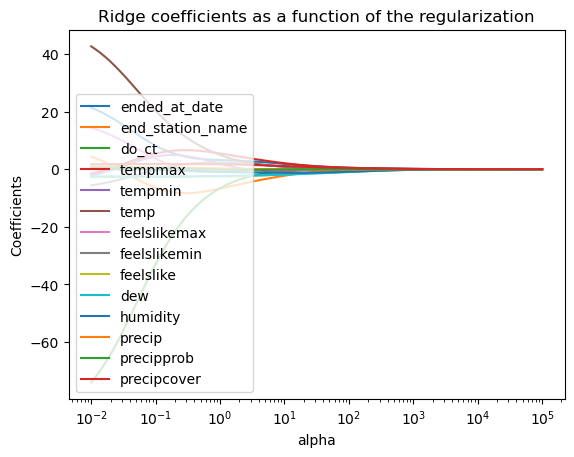

In [137]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [138]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']])

In [139]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']].columns))

The coefficients are:
tempmax         0.103319
tempmin         0.015408
temp            0.062078
feelslikemax    0.099710
feelslikemin    0.040424
feelslike       0.077282
dew            -0.001406
humidity       -0.124935
precip         -0.201112
precipprob     -0.220270
precipcover    -0.206020
snow           -0.043669
windspeed      -0.018511
winddir         0.075207
dtype: float64


In [140]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 55.90810182512222


In [141]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']].columns))

The coefficients are:
tempmax         0.710046
tempmin        -0.461904
temp            0.086123
feelslikemax    0.719945
feelslikemin   -0.111727
feelslike       0.370408
dew             0.002307
humidity       -0.220404
precip         -1.143415
precipprob     -1.235117
precipcover    -1.051164
snow           -0.159105
windspeed      -0.024461
winddir         0.531427
dtype: float64


In [142]:
r_r_p = r2_score(y_test, ridgecv.predict(scale(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']])))
print(f"R^2 in pickup test data for Ridge is {r_r_p}")

R^2 in pickup test data for Ridge is 0.2756219424302043


In [143]:
r_m_p = mean_squared_error(y_test, ridgecv.predict(scale(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']])))
print(f"MSE in pickup test data for Ridge is {r_m_p}")

MSE in pickup test data for Ridge is 82.50585589269132


## Ridge - Dropoff

In [144]:
# Splitting the dataset for training and testing
X = df_merge.drop(columns=['do_ct','ended_at_date','end_station_name'])
y = df_merge['do_ct']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=200)

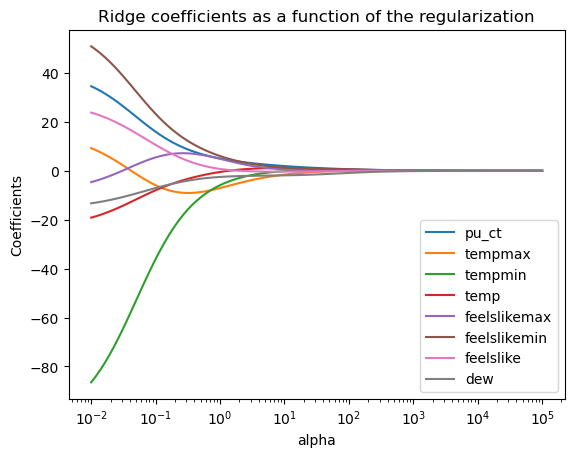

In [168]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]), y_train)
    coefs.append(ridge.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Ridge coefficients as a function of the regularization');

In [169]:
# standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']])

In [170]:
# set a large alpha to get smaller coefficients
ridge = Ridge(alpha=1000)
ridge.fit(scaler.transform(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]), y_train)

print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']].columns))

The coefficients are:
tempmax         0.149782
tempmin         0.073784
temp            0.115320
feelslikemax    0.136854
feelslikemin    0.097467
feelslike       0.128594
dew             0.046129
humidity       -0.117748
dtype: float64


In [171]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]), y_train)

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 0.019179102616724886


In [172]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]), y_train)
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']].columns))

The coefficients are:
tempmax         30.415517
tempmin          5.637341
temp           -75.331935
feelslikemax   -16.651522
feelslikemin    -2.166443
feelslike       44.710447
dew             21.107038
humidity       -11.987350
dtype: float64


In [173]:
r_r_d = r2_score(y_test, ridgecv.predict(scale(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']])))
print(f"R^2 in drop off test data for Ridge is {r_r_d}")

R^2 in drop off test data for Ridge is 0.3054804665187536


In [174]:
r_m_d = mean_squared_error(y_test, ridgecv.predict(scale(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']])))
print(f"MSE in drop off test data for Ridge is {r_m_d}")

MSE in drop off test data for Ridge is 76.7397783194545


## Lasso - Pickup

In [189]:
# Splitting the dataset for training and testing
X = df_merge.drop(columns=['pu_ct','ended_at_date','end_station_name'])
y = df_merge['pu_ct']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=200)

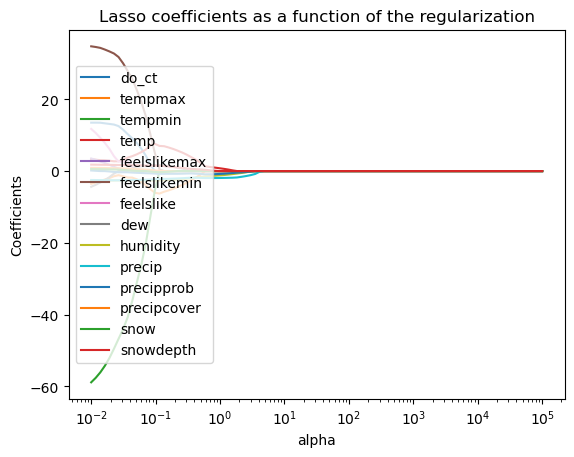

In [190]:
alphas = 10**np.linspace(-2,5,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [191]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas)
lassocv.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 1.5556761439304723


In [192]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']].columns))

The coefficients are:
tempmax         0.000000
tempmin         0.000000
temp            0.000000
feelslikemax    0.199025
feelslikemin    0.000000
feelslike       0.000000
dew             0.000000
humidity       -0.000000
precip         -0.857777
precipprob     -1.855704
precipcover    -0.548769
snow           -0.000000
windspeed       0.000000
winddir         0.000000
dtype: float64


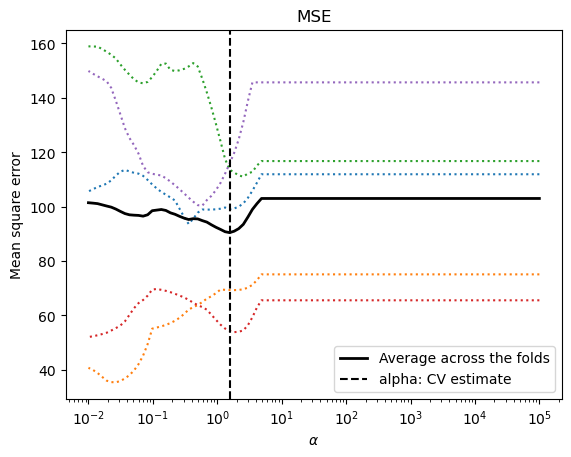

In [193]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [196]:
l_r_p = r2_score(y_test, lassocv.predict(scale(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']])))
print(f"R^2 in pickup test data for Lasso is: {l_r_p}")

R^2 in pickup test data for Lasso is: 0.1478334150504408


In [197]:
#test data mse
l_m_p = mean_squared_error(y_test, lassocv.predict(scale(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']])))
print(f"MSE in pickup test data for Lasso is {l_m_p}")

MSE in pickup test data for Lasso is 97.06082717399373


## LASSO - Dropoff

In [198]:
# Splitting the dataset for training and testing
X = df_merge.drop(columns=['do_ct','ended_at_date','end_station_name'])
y = df_merge['do_ct']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=200)

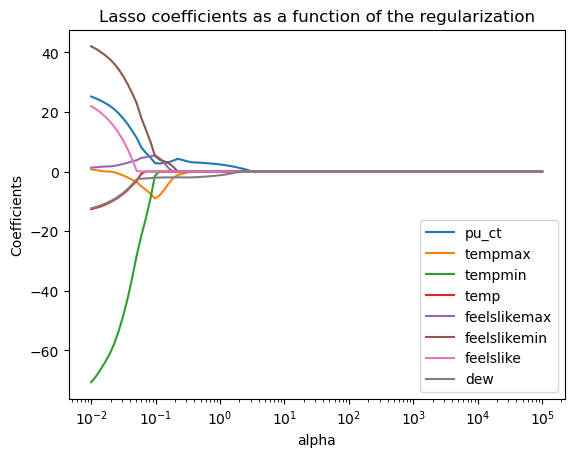

In [199]:
alphas = 10**np.linspace(-2,5,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())  
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [200]:
# find the best alpha via CV with selected scoring metric
lassocv = LassoCV(alphas=alphas)
lassocv.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]), y_train)

print('The best alpha from LassoCV:', lassocv.alpha_)

The best alpha from LassoCV: 0.5857020818056664


In [201]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]), y_train)
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']].columns))

The coefficients are:
tempmax         2.841152
tempmin        -0.000000
temp            0.000000
feelslikemax    0.000000
feelslikemin    0.000000
feelslike       0.000000
dew            -0.000000
humidity       -1.713310
dtype: float64


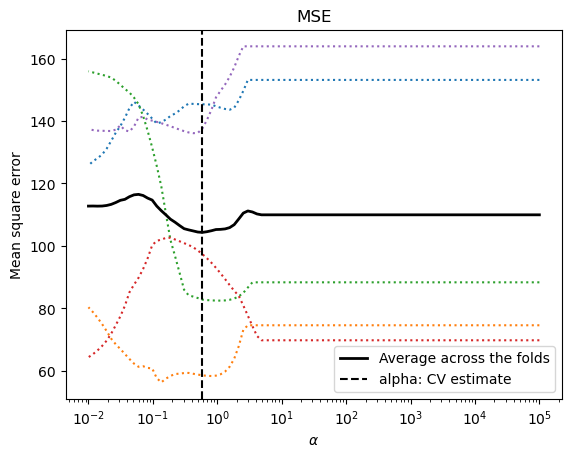

In [202]:
plt.semilogx(lassocv.alphas_, lassocv.mse_path_, linestyle=":")
plt.plot(
    lassocv.alphas_,
    lassocv.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocv.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [204]:
l_r_d = r2_score(y_test, lassocv.predict(scale(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']])))
print(f"R^2 in drop off test data for Lasso is: {l_r_d}")

R^2 in drop off test data for Lasso is: 0.21467805229593462


In [205]:
#test data mse
l_m_d = mean_squared_error(y_test, lassocv.predict(scale(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']])))
print(f"MSE in drop off test data for Lasso is {l_m_d}")

MSE in drop off test data for Lasso is 86.77283974164784


## Elastic Net - Pickup

In [ ]:
# Splitting the dataset for training and testing
X = df_merge.drop(columns=['pu_ct','ended_at_date','end_station_name'])
y = df_merge['pu_ct']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=200)

In [206]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 1.03493358802253


In [218]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]), y_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']].columns))


The coefficients are:
tempmax         0.917526
tempmin         0.000000
temp            0.000000
feelslikemax    0.654986
feelslikemin    0.000000
feelslike       0.367033
dew             0.000000
humidity       -0.000000
precip         -1.273815
precipprob     -1.346570
precipcover    -0.690803
snow            0.000000
windspeed      -0.184903
winddir        -0.000000
dtype: float64


In [219]:
e_r_p = r2_score(y_test, ENcv.predict(scale(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']])))
print(f"R2 in pickup test data for Elastic Net is {e_r_p}")

R2 in pickup test data for Elastic Net is 0.2611483441019684


In [220]:
e_m_p = mean_squared_error(y_test, ENcv.predict(scale(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']])))
print(f"MSE in pickup test data for Elastic Net is {e_m_p}")

MSE in pickup test data for Elastic Net is 81.63818229902648


## Elastic Net - Dropoff

In [221]:
# Splitting the dataset for training and testing
X = df_merge.drop(columns=['do_ct','ended_at_date','end_station_name'])
y = df_merge['do_ct']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=200)

In [222]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]), y_train)

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.34106109266715684


In [223]:
# with the best alpha
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]), y_train)


EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]), y_train)

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']].columns))

The coefficients are:
tempmax         1.727420
tempmin        -0.482007
temp            0.000000
feelslikemax    0.838336
feelslikemin    0.000000
feelslike       0.876497
dew            -0.000000
humidity       -1.851036
dtype: float64


In [224]:
e_r_d = r2_score(y_test, ENcv.predict(scale(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']])))
print(f"R2 in drop off test data for Elastic Net is {e_r_d}")

R2 in drop off test data for Elastic Net is 0.23099600628652295


In [226]:
e_m_d = mean_squared_error(y_test, ENcv.predict(scale(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']])))
print(f"MSE in drop off test data for Elastic Net is {e_m_d}")

MSE in drop off test data for Elastic Net is 84.96981461204777


## KNN - Pickup

In [253]:
# Splitting the dataset for training and testing
X = df_merge.drop(columns=['pu_ct','ended_at_date','end_station_name'])
y = df_merge['pu_ct']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=200)

In [254]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [255]:
model = neighbors.KNeighborsRegressor(n_neighbors = 15)
model.fit(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']], y_train)

KNeighborsRegressor(n_neighbors=15)

In [256]:
# Testing MSE
k_m_p = mean_squared_error(y_test, model.predict(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]))
print(f"MSE in pickup test data for KNN is {k_m_p}")

MSE in pickup test data for KNN is 95.0970864197531


In [257]:
# Training R2
k_r_p = r2_score(y_train, model.predict(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]))
print(f"R2 in pickup training data for KNN is {k_r_p}")

R2 in pickup training data for KNN is 0.18724361621822883


In [258]:
# Tranining MSE
k_m_tr_p = mean_squared_error(y_train, model.predict(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]))
print(f"MSE in pickup training data for KNN is {k_m_tr_p}")

MSE in pickup training data for KNN is 81.44970370370372


In [235]:
k_m_tr_p = [-1]*30
k_m_p = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']], y_train)  #fit the model
    k_m_tr_p[K] = mean_squared_error(y_train, model.predict(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'windspeed', 'winddir']]))
    k_m_p[K] = mean_squared_error(y_test, model.predict(X_test))

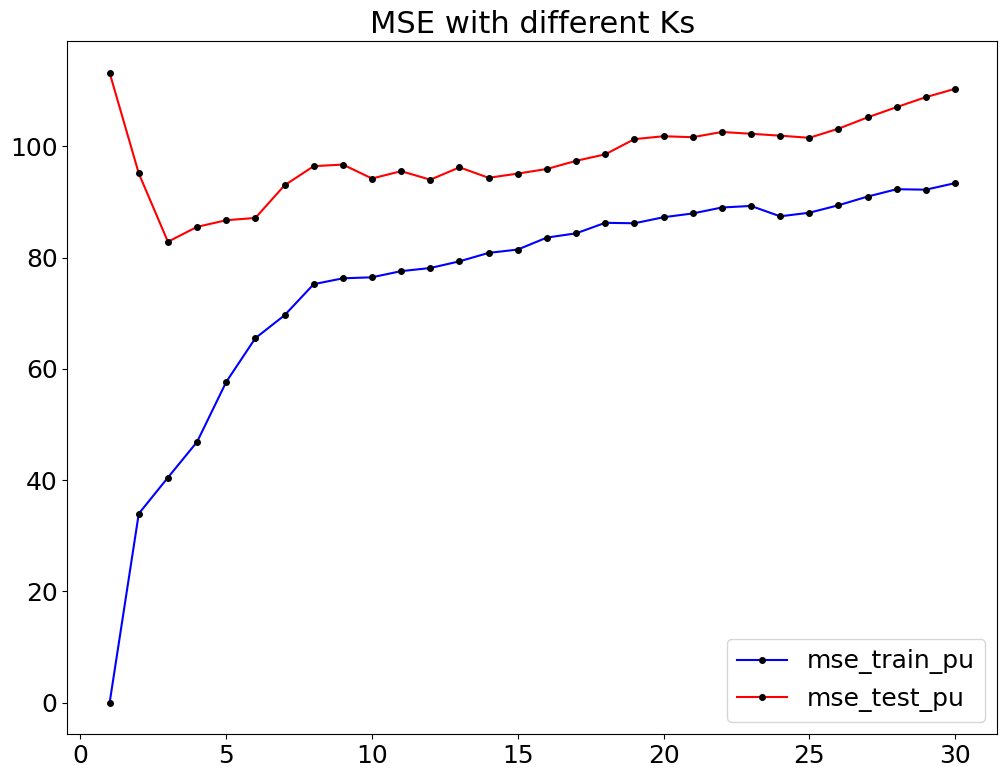

In [236]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, k_m_tr_p,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train_pu')
plt.plot(np.arange(30)+1, k_m_p,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test_pu')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

## KNN - Dropoff

In [243]:
# Splitting the dataset for training and testing
X = df_merge.drop(columns=['do_ct','ended_at_date','end_station_name'])
y = df_merge['do_ct']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=200)

In [244]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

model = neighbors.KNeighborsRegressor(n_neighbors = 15)
model.fit(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']], y_train)

KNeighborsRegressor(n_neighbors=15)

In [245]:
# Testing MSE
k_m_d = mean_squared_error(y_test, model.predict(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]))
print(f"MSE in drop off test data for KNN is {k_m_d}")

MSE in drop off test data for KNN is 99.83150617283951


In [246]:
# Training R2
k_r_d = r2_score(y_train, model.predict(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]))
print(f"R2 in drop off training data for KNN is {k_r_d}")

R2 in drop off training data for KNN is 0.1408145191218788


In [250]:
# Tranining MSE
k_m_tr_d = mean_squared_error(y_train, model.predict(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]))
print(f"MSE in drop off training data for KNN is {k_m_tr_d}")

MSE in drop off training data for KNN is 102.91885185185187


In [248]:
k_m_tr_d = [-1]*30
k_m_d = [-1]*30
for K in range(30):
    model = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model.fit(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']], y_train)  #fit the model
    k_m_tr_d[K] = mean_squared_error(y_train, model.predict(X_train[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]))
    k_m_d[K] = mean_squared_error(y_test, model.predict(X_test[['tempmax', 'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity']]))

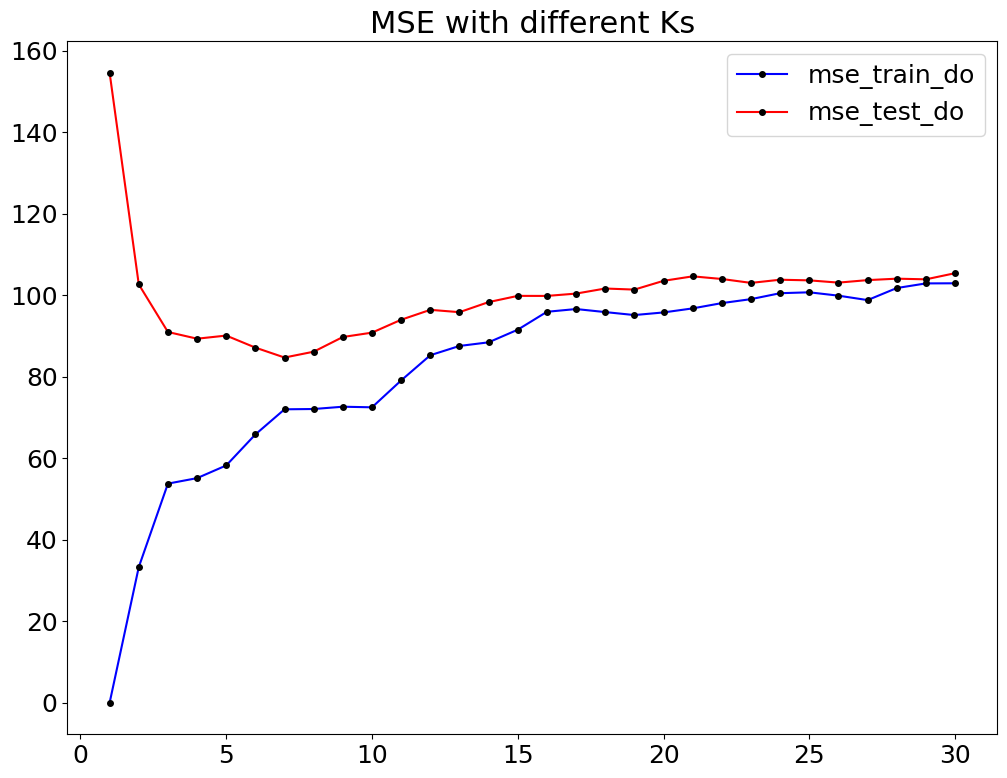

In [249]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, k_m_tr_d,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train_do')
plt.plot(np.arange(30)+1, k_m_d,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test_do')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()